In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 30)
import numpy as np
from sklearn import preprocessing

In [2]:
titanic = pd.read_csv('../data/raw/titanic.csv')

In [3]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# Dropping duplicate or unrelated columns 
Here we also remove some synthetic features as we want to keep the examples simple. 

In [4]:
titanic = titanic.drop(['class', 'embarked', 'alive' ,'who', 'adult_male'], axis = 1)

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,True


# Outlier removal

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='fare'>

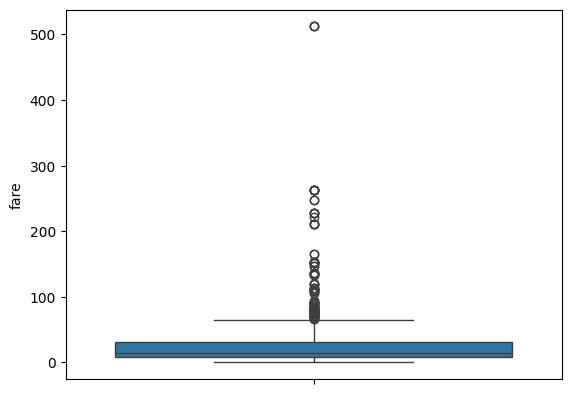

In [7]:
sns.boxplot(y = titanic.fare)

In [8]:
titanic.fare.quantile(0.95)

np.float64(112.07915)

In [9]:
titanic.loc[titanic.fare > titanic.fare.quantile(0.95), 'fare'] = titanic.fare.quantile(0.95)
#plot again and describe again.... 

# Handling missing values

In [10]:
print(titanic.isnull().sum()/len(titanic))

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
deck           0.772166
embark_town    0.002245
alone          0.000000
dtype: float64


In [11]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,True
5,0,3,male,NaN,0,0,8.4583,NaN,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,E,Southampton,True
7,0,3,male,2.0,3,1,21.0750,NaN,Southampton,False
8,1,3,female,27.0,0,2,11.1333,NaN,Southampton,False
9,1,2,female,14.0,1,0,30.0708,NaN,Cherbourg,False


In [12]:
titanic = titanic.drop('deck', axis =1)

In [13]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Southampton,True
3,1,1,female,35.0,1,0,53.1000,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Southampton,True
5,0,3,male,NaN,0,0,8.4583,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,Southampton,True
7,0,3,male,2.0,3,1,21.0750,Southampton,False
8,1,3,female,27.0,0,2,11.1333,Southampton,False
9,1,2,female,14.0,1,0,30.0708,Cherbourg,False


In [14]:
# replace missings in age with median age
titanic.loc[titanic.age.isnull(), 'age'] = titanic.age.median()

In [15]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Southampton,True
3,1,1,female,35.0,1,0,53.1000,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Southampton,True
5,0,3,male,28.0,0,0,8.4583,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,Southampton,True
7,0,3,male,2.0,3,1,21.0750,Southampton,False
8,1,3,female,27.0,0,2,11.1333,Southampton,False
9,1,2,female,14.0,1,0,30.0708,Cherbourg,False


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  889 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [17]:
# drops when at least one  outlier
titanic = titanic.dropna()

In [18]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Southampton,True
3,1,1,female,35.0,1,0,53.1000,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Southampton,True
5,0,3,male,28.0,0,0,8.4583,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,Southampton,True
7,0,3,male,2.0,3,1,21.0750,Southampton,False
8,1,3,female,27.0,0,2,11.1333,Southampton,False
9,1,2,female,14.0,1,0,30.0708,Cherbourg,False


# Handling categorical data

In [19]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Southampton,True


In [20]:
# Handling orderd data // create a Python dictonary
#pclass_map = {'First':1, 'Second':2, 'Third':3}
#titanic['pclass'] = titanic['pclass'].apply(lambda x: pclass_map[x])

# Handling binary data
columns_binary = ['sex',  'alone']
titanic = pd.get_dummies(titanic, drop_first=True, columns=columns_binary)

# Handling multi-class data
columns_binary = ['embark_town']
titanic = pd.get_dummies(titanic, columns=columns_binary)

In [21]:
titanic.head(10)

,survived,pclass,age,sibsp,parch,fare,sex_male,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,True,False,False,False,True
1,1,1,38.0,1,0,71.2833,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,False,False,True
5,0,3,28.0,0,0,8.4583,True,True,False,True,False
6,0,1,54.0,0,0,51.8625,True,True,False,False,True
7,0,3,2.0,3,1,21.0750,True,False,False,False,True
8,1,3,27.0,0,2,11.1333,False,False,False,False,True
9,1,2,14.0,1,0,30.0708,False,False,True,False,False


In [22]:
titanic.to_csv("../data/processed/titanic_clean.csv", index= False)

# Example of scaling

In [23]:
scaled = preprocessing.minmax_scale(X=titanic)
pd.DataFrame(scaled,  columns= titanic.columns).head(3)

,survived,pclass,age,sibsp,parch,fare,sex_male,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,1.0,0.271174,0.125,0.0,0.064686,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.636009,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.070709,0.0,1.0,0.0,0.0,1.0
